In [22]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
rounds = 50
vehicle_limit = 80
all_routes = [[0, 1], [2, 3]]

In [24]:
record = pd.read_csv(f'Saved_HM/Simulation_records/Round_{rounds}.csv')
utility = pd.read_csv(f'Saved_HM/Utility_data/Round_{rounds}.csv')

In [25]:
record

,Vehicle_label,Road_order,Total_time,Leading_vehicles,Stopped_time,Stop_while_front,Round_number
0,0,"[0, 1]",67.40,"[-999, -999]","[0, 0]","[0, 0]",1
1,1,"[0, 1]",70.10,"[0, 0]","[0, 0]","[0, 0]",1
2,2,"[2, 3]",67.75,"[-999, -999]","[0, 0]","[0, 0]",1
3,3,"[2, 3]",70.85,"[2, 2]","[0, 0]","[0, 0]",1
4,4,"[2, 3]",72.75,"[3, 3]","[0, 0]","[0, 0]",1
...,...,...,...,...,...,...,...
3995,75,"[0, 1]",127.50,"[74, 74]","[0, 0]","[0, 0]",50
3996,76,"[0, 1]",127.55,"[75, 75]","[0, 0]","[0, 0]",50
3997,77,"[0, 1]",127.45,"[76, 76]","[0, 0]","[0, 0]",50
3998,78,"[0, 1]",127.45,"[77, 77]","[0, 0]","[0, 0]",50


In [26]:
record['Road_order'] = record.apply(lambda row: ast.literal_eval(row['Road_order']), axis=1)
record["Road_order_label"] = record.apply(lambda row: all_routes.index(row.Road_order), axis=1)

In [27]:
# time_df = pd.DataFrame(utility['Routes_taken'].to_list(), columns=range(rounds))
# print(route_df.shape)
# display(route_df.head(10))

In [28]:
time_df = pd.pivot_table(record, values='Total_time', 
                         index=['Road_order_label', 'Round_number'], 
                         aggfunc=np.mean).reset_index(drop=False)
# time_df.loc[time_df.Road_order_label==1].sort_values('Round_number').Total_time.values

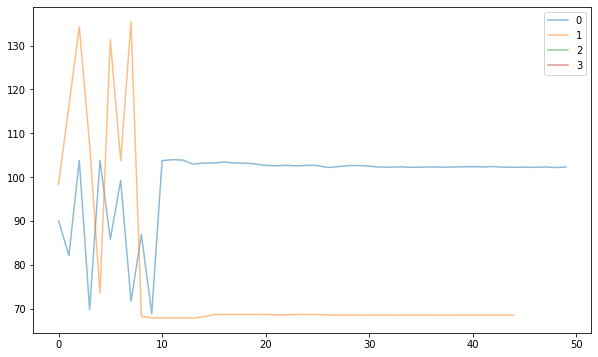

In [29]:
# Changes in average time needed to go through each route over time
plot_route_time = [[], [], [], []]

for i in range(2):
    times = time_df.loc[time_df.Road_order_label==i].sort_values('Round_number').Total_time.values
    plot_route_time[i]=times
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.plot(plot_route_time[i], label=str(i), alpha=0.5)
    
plt.legend()

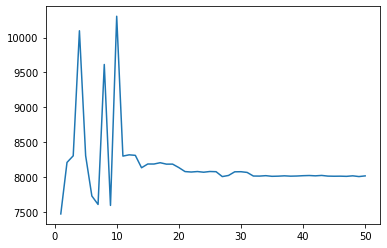

In [30]:
time_df2 = pd.pivot_table(record, values='Total_time', index='Round_number', aggfunc=np.sum).reset_index(drop=False)
plt.plot(time_df2.Round_number, time_df2.Total_time)

In [43]:
time_df2.Total_time.mean()

8166.373999999733

In [32]:
# utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# prob_df = pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))
# print(prob_df.shape)
# display(prob_df.head(10))

In [33]:
utility['Routes_taken'] = utility.apply(lambda row: ast.literal_eval(row['Routes_taken']), axis=1)
route_df = pd.DataFrame(utility['Routes_taken'].to_list(), columns=range(rounds))
print(route_df.shape)
display(route_df.head(10))

(80, 50)


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


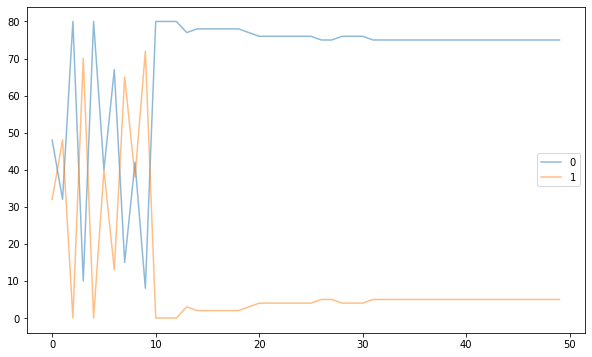

In [34]:
# Changes in number of vehicles that took the route over time
plot_route_l = [[], [], [], []]

for i in range(2):
    for j in range(rounds):
        plot_route_l[i].append(len(route_df.loc[route_df[j]==i]))
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(2):
    ax.plot(plot_route_l[i], label=str(i), alpha=0.5)
    
plt.legend()

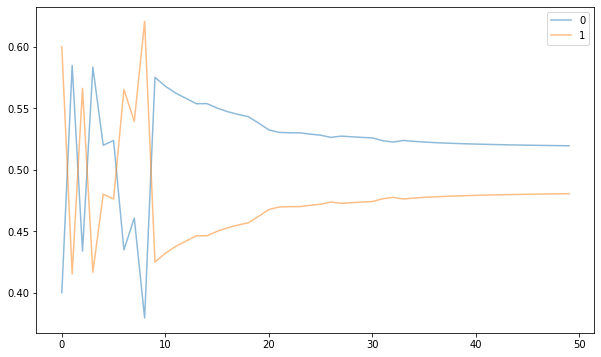

In [35]:
# Changes in vehicles' probabilities of selecting each route over time
plot_prob_l = [[], [], [], []]

for r in range(1, rounds+1):
    df = pd.read_csv(f'Saved_HM/Utility_data/Round_{r}.csv')
    df['Probabilities'] = df.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
    for i in range(2):
        avg_prob = pd.DataFrame(df['Probabilities'].to_list(), columns=range(2))[i].mean()
        plot_prob_l[i].append(avg_prob)
        
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(2):
    ax.plot(plot_prob_l[i], label=str(i), alpha=0.5)
    
plt.legend()

In [36]:
utility

,Vehicle_label,Utilities,Probabilities,Routes_taken,Gamma,Eta
0,0,"[-2.9529585905288536, -2.955764524964179]","[0.5007014831485843, 0.4992985168514156]","[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...",0.769902,0.844889
1,1,"[-3.6376180751823504, -3.6473053396877995]","[0.5024217971873136, 0.49757820281268644]","[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...",0.613225,0.982176
2,2,"[-3.368436062303536, -3.3728396398247678]","[0.5011008926013124, 0.4988991073986876]","[1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...",1.043895,0.880625
3,3,"[-2.0097335991492455, -2.013369308675194]","[0.5009089263802758, 0.49909107361972416]","[1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...",1.039173,0.585676
4,4,"[-2.0727927905685966, -2.0790255704815443]","[0.5015581899339191, 0.49844181006608096]","[1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...",1.081037,0.602946
...,...,...,...,...,...,...
75,75,"[-3.21723514682471, -3.320739682101679]","[0.5258530572156938, 0.47414694278430625]","[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...",1.126536,0.810765
76,76,"[-2.233819892337936, -2.2712660551009445]","[0.5093604469363057, 0.4906395530636943]","[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...",1.259441,0.616272
77,77,"[-3.87608553957112, -4.00879262413463]","[0.5331281665901897, 0.46687183340981026]","[1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...",0.909519,0.912311
78,78,"[-6.699160877087149, -7.157787925081062]","[0.6126884232672939, 0.38731157673270616]","[0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, ...",1.140101,1.115104


In [37]:
# utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# pd.DataFrame(df['Probabilities'].to_list(), columns=range(4))[i].mean()

In [38]:
plot_eta_prob = [[], [], [], []]

utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))[i].values

for i in range(2):
    plot_eta_prob[i]=pd.DataFrame(utility['Probabilities'].to_list(), columns=range(2))[i].values

In [39]:
# pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))[i].values

In [40]:
# len(utility.Eta.values), len(plot_eta_prob[1])

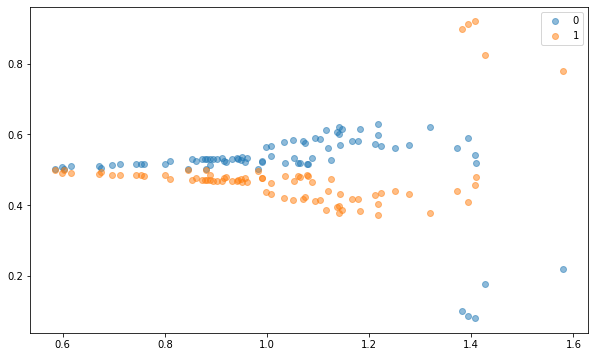

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(2):
    ax.scatter(utility.Eta.values, plot_eta_prob[i], label=str(i), alpha=0.5)
    
plt.legend()

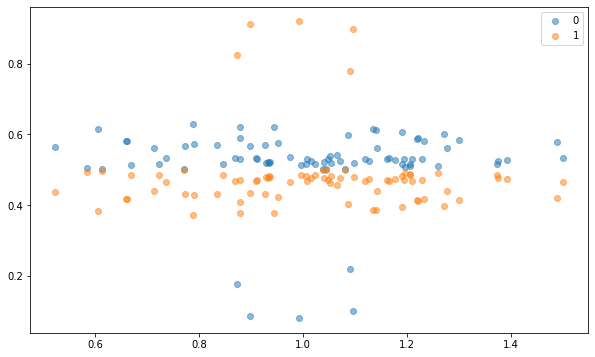

In [42]:
plot_gamma_prob = plot_eta_prob

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(2):
    ax.scatter(utility.Gamma.values, plot_gamma_prob[i], label=str(i), alpha=0.5)
    
plt.legend()